In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dev_predict = pd.read_csv('../output.csv')
dev_label = pd.read_csv('../data/dev.csv')
dev = pd.merge(dev_label, dev_predict, on='id')
dev.head()

,id,source,sentence_1,sentence_2,label,binary-label,target
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0,1.9
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0,2.6
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0,4.7
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0,3.7
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0,2.3


<Axes: xlabel='label', ylabel='target'>

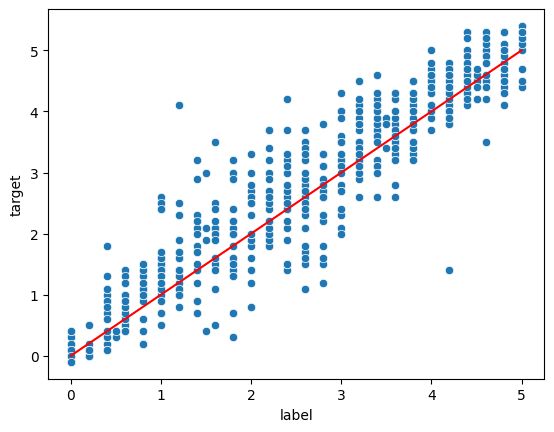

In [6]:
sns.scatterplot(x='label', y='target', data=dev)
sns.lineplot(x=[0, 5], y=[0, 5], color='red')

In [7]:
dev['diff'] = abs(dev['label'] - dev['target'])
dev = dev.sort_values(by='diff', ascending=False)
for ele in dev.iterrows():
    print("", ele[1]['sentence_1'], "\n", ele[1]['sentence_2'], "\n", ele[1]['label'], ele[1]['target'])

 (선언만 해두고 차후에 적정시점 실행) 
 (나중에 적절한 시점에 선언하고 실행하면 됨) 
 1.2 4.1
 자브라 대만족이죠! 
 Jabra에 매우 만족합니다! 
 4.2 1.4
 편보다 편이 더 재밌는 영화... 편부터는 보지마 
 본편보다 영화가 더 재밌어... 본편은 보지마 
 1.6 3.5
 ㅋㅋ너무 재밌었어요!!! 
 다시 봐도 너무 웃겨요ㅋㅋ 
 1.4 3.2
 과장과 공포에 굴복하여 도리어 국민생명을 위협하고 있는 비이성적인 '독일 따라하기' 탈원전 정책을 멈춰주십시오. 
 과장과 공포에 굴복하여 국민의 생명을 위협하는 불합리한 '독일을 모방'하는 비핵화 정책을 멈춰주세요. 
 2.4 4.2
 문재인 최악 대통령 
 문재인 대통령 당신은 
 1.0 2.6
 분을 두시간으로 늘리고싶다면 이 영화를 추천. 
 인생에서 두시간을 쓰레기통에 버리고싶다면 보세요. 
 2.8 1.2
 엥 제가 2등인가요? ㅋㅋ 
 엥 은메달인가요 제가? ㅋㅋ 
 2.6 1.1
 조두순 사형 해야합니다 
 조두순을 무기징역으로 해야합니다 
 1.5 3.0
 강남 오피스 투어 다음에 저도 참여하겠습니다 ㅎㅎㅎ 
 다음에 강남 오피스 한번 방문하겠습니다~! 
 2.2 3.7
 갈수록 뛰는 시간이 늘 것 같은 설렘!! 
 러닝타임이 길어질수록 더해지는 것 같은 설렘!! 
 2.2 3.7
 한시간이 넘도록 말씀 나누는데 모니터 빨려들어갈 뻔 했네요. 
 30분이 얘기하다보니 한시간이 되었네요. 
 1.0 2.5
 아무래도 상관 없어요. 
 그것은 정말 중요하지 않습니다. 
 1.8 0.3
 되게 집중해서 봤다 
 처음엔 집중해서 봤는데 갈수록개막장 
 1.4 2.9
 수능 연기로 인한 피해에 대해 
 수능 연기로 인한 이후 상황에 대한 대책 마련 
 1.8 3.2
 조금이라도 본 게 아까워서라도 웬만하면 끝까지 볼랬는데, 토나올 것 같아 도저히 못 보겠어요. 
 보다가 중간에 끄고 싶었은데 본게 아까워서 못껐다 
 1.0 2.4
 한시적 누진세 완화 
 누진세 완화말고 일시폐지!

In [8]:
loss_ge = 0
ge_cnt = 0
loss_le = 0
le_cnt = 0
for ele in dev.iterrows():
    if ele[1]['label'] < ele[1]['target']:
        loss_ge += ele[1]['diff']
        ge_cnt += 1
    else:
        loss_le += ele[1]['diff']
        le_cnt += 1
print("loss_ge:", loss_ge / ge_cnt)
print("loss_le:", loss_le / le_cnt)
loss_ge / ge_cnt - loss_le / le_cnt

loss_ge: 0.498148148148148
loss_le: 0.3207964601769901


0.1773516879711579